In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("twitter_training (1).csv")

In [4]:
df.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df1 = pd.read_csv("twitter_validation (1).csv")

In [6]:
df1.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(df['Sentiment'])
X_val = vectorizer.transform(df1['Sentiment'])
model = MultinomialNB(alpha=1.5)
model.fit(X_train, df['Sentiment'])

MultinomialNB(alpha=1.5)

In [9]:
predictions = model.predict(X_val)
from sklearn.metrics import f1_score

f1 = f1_score(df1['Sentiment'], predictions,average='micro')
print(f'F1 Score:{f1:.2f}')

F1 Score:1.00


In [25]:
print('Classification Report\n', classification_report(df1['Sentiment'], predictions))
print('Confusion Matrix:\n', confusion_matrix(df1['Sentiment'], predictions))

Classification Report
               precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00       171
    Negative       1.00      1.00      1.00       266
     Neutral       1.00      1.00      1.00       285
    Positive       1.00      1.00      1.00       277

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

Confusion Matrix:
 [[171   0   0   0]
 [  0 266   0   0]
 [  0   0 285   0]
 [  0   0   0 277]]


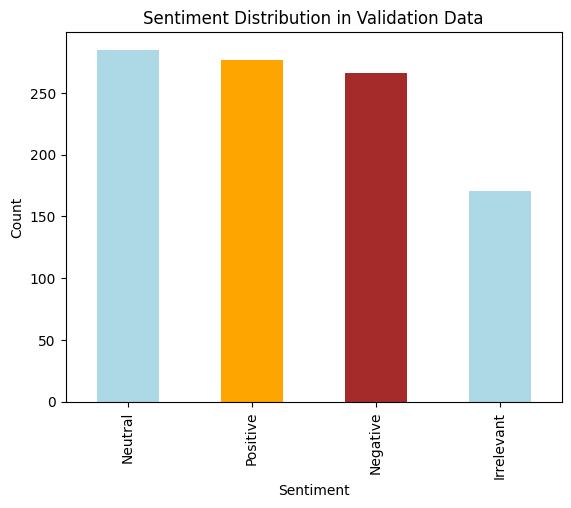

In [30]:
sentiment_distribution = df1['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar',color=['lightblue','orange','brown'])
plt.title("Sentiment Distribution in Validation Data")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

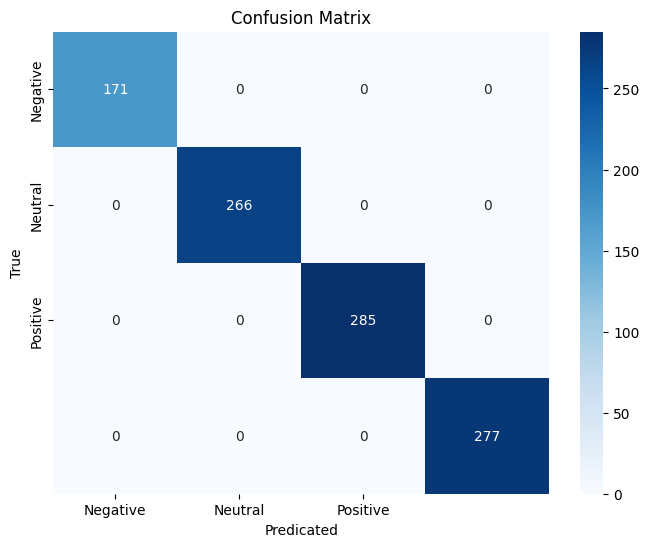

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(df1['Sentiment'], predictions), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Neutral','Positive'], 
           yticklabels=['Negative','Neutral','Positive'])
plt.title("Confusion Matrix")
plt.xlabel('Predicated')
plt.ylabel('True')
plt.show()

C:\Users\Ayush dalwala\AppData\Local\Temp\ipykernel_15240\3071338940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette=['green','pink','maroon'])
C:\Users\Ayush dalwala\AppData\Local\Temp\ipykernel_15240\3071338940.py:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=predictions, palette=['green','pink','maroon'])


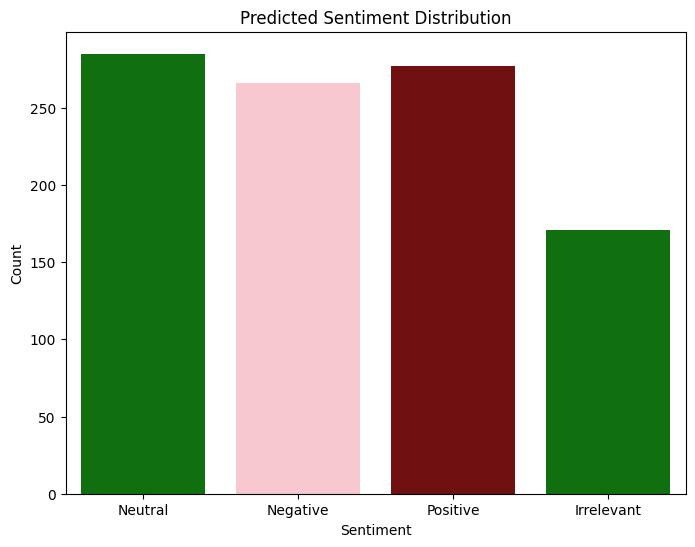

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x=predictions, palette=['green','pink','maroon'])
plt.title("Predicted Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ayush
[nltk_data]     dalwala\AppData\Roaming\nltk_data...


True

In [53]:
sid = SentimentIntensityAnalyzer()

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word.isalpha()]
        tokens = [word.lower() for word in tokens]
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if not word in stop_words]
        return ' '.join(tokens)
    else:
        return ''

In [54]:
import sys
print(sys.executable)

C:\Users\Ayush dalwala\AppData\Local\Programs\Python\Python311\python.exe


In [57]:
from wordcloud import WordCloud
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ayush
[nltk_data]     dalwala\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     dalwala\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [59]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Ayush
[nltk_data]     dalwala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     dalwala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
df['clean_text'] = df['Tweet Content'].apply(preprocess_text)
df['sentiment_score'] = df['clean_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

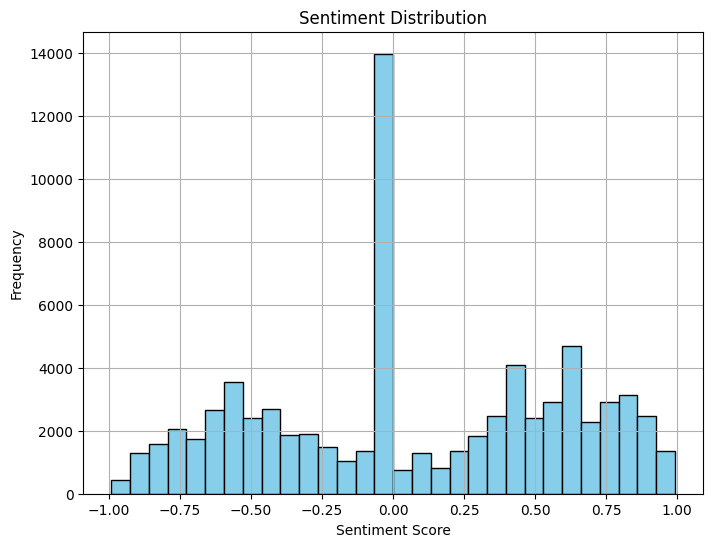

In [61]:
plt.figure(figsize=(8,6))
plt.hist(df['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [62]:
df['Tweet Content'] = df['Tweet Content'].astype(str)
df['Tweet Content'] = df['Tweet Content'].apply(lambda x: x if isinstance(x, str) else "")

In [68]:
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

df['sentiment_score'] = df['Tweet Content'].apply(get_sentiment_score)
positive_text = ' '.join(df[df['sentiment_score']>0]['Tweet Content'])
negative_text = ' '.join(df[df['sentiment_score']<0]['Tweet Content'])

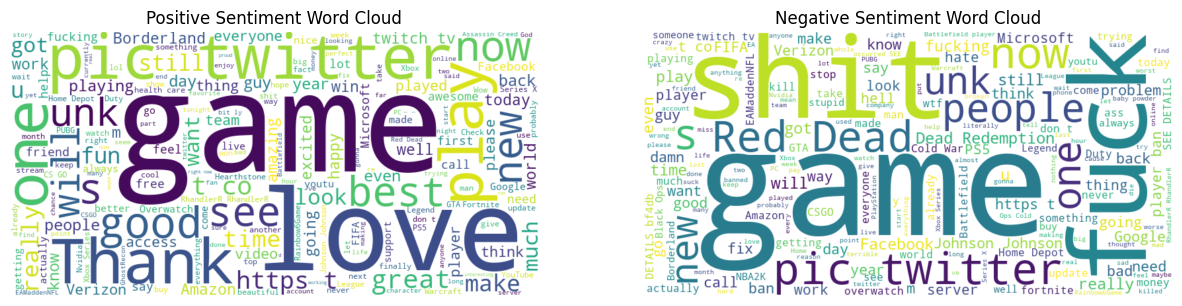

In [73]:
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Sentiment Word Cloud")
plt.axis('off')

plt.subplot(1,2,2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Sentiment Word Cloud")
plt.axis('off')
plt.show()